<a href="https://colab.research.google.com/github/joaocabeca2/ebac/blob/main/Profissao_Analista_de_dados_M13_Exercicio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Data Wrangling II
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Agregação e Ordenação;</li>
  <li>Combinação;</li>
  <li>Técnicas Avançadas.</li>
</ol>

---

# **Exercícios**

Neste exercícios, vamos trabalhar com dados geográficos, demográficos e econômicos do Brasil. Vamos manipular e combinar dados de duas frentes distintas para poder responder perguntas de negócios.

## 1\. Data Wrangling

### **1.1. Estados**

O arquivo `estados-bruto.xml` contém informações sobre estados (nome, sigla e região). **Carregue-o na máquina virtual do Google Colab**. Um arquivo do tipo XML é similar a um arquivo do tipo HTML, exemplo do estado do Acre:

```xml
<ESTADO>
  <ID>1</ID>
  <NOME>ACRE</NOME>
  <IDCAPITAL>16</IDCAPITAL>
  <SIGLA>AC</SIGLA>
  <REGIAO>NORTE</REGIAO>
</ESTADO>
```

Utilize o pacote Python `beautifulsoup4` para extrair os dados do arquivo `estados-bruto.xml` providenciado. Salve os dados extraidos no arquivo `estados-limpo.csv` separado por `;`. Exemplo das três primeiras linhas mais o cabeçalho:

```
estado;sigla;regiao
ACRE;AC;NORTE
ALAGOAS;AL;NORDESTE
AMAPA;AP;NORTE
```

**Dica**: Utilize o parser de xml chamado `lxml` do `beautifulsoup4`.

In [11]:
# lendo o arquivo xml e armazenando os dados nome,sigla e regiao em listas
from bs4 import BeautifulSoup

with open(file='estados-bruto.xml',mode='r',encoding='utf8') as arq:
    fonte = BeautifulSoup(arq, features='xml')
    estados = list(map(lambda estado: estado.get_text(),fonte.find_all('NOME')))
    siglas = list(map(lambda sigla: sigla.get_text(),fonte.find_all('SIGLA')))
    regioes = list(map(lambda regiao: regiao.get_text(),fonte.find_all('REGIAO')))


In [12]:
#criar e transferir os dados armazenados nas listas em um arquivo csv
import csv

with open(file='./estados-limpo.csv',mode='w') as csvfile:
    csvfile = csv.writer(csvfile,delimiter=';')
    csvfile.writerow(['estado','sigla','regiao'])
    for x in range(len(estados)):
        csvfile.writerow([estados[x],siglas[x],regioes[x]])

In [13]:
print(estados)
print(siglas)
print(regioes)

['ACRE', 'ALAGOAS', 'AMAPA', 'AMAZONAS', 'BAHIA', 'CEARA', 'DISTRITO FEDERAL', 'ESPIRITO SANTO', 'GOIAS', 'MARANHAO', 'MATO GROSSO', 'MATO GROSSO DO SUL', 'PARA', 'PARAIBA', 'PARANA', 'PERNAMBUCO', 'PIAUI', 'RIO DE JANEIRO', 'RIO GRANDE DO NORTE', 'RIO GRANDE DO SUL', 'RONDONIA', 'RORAIMA', 'SANTA CATARINA', 'SAO PAULO', 'SERGIPE', 'TOCANTINS', 'MINAS GERAIS']
['AC', 'AL', 'AP', 'AM', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MT', 'MS', 'PA', 'PB', 'PR', 'PE', 'PI', 'RJ', 'RN', 'RS', 'RO', 'RR', 'SC', 'SP', 'SE', 'TO', 'MG']
['NORTE', 'NORDESTE', 'NORTE', 'NORTE', 'NORDESTE', 'NORDESTE', 'CENTRO-OESTE', 'SUDESTE', 'CENTRO-OESTE', 'NORDESTE', 'CENTRO-OESTE', 'CENTRO-OESTE', 'NORTE', 'NORDESTE', 'SUL', 'NORDESTE', 'NORDESTE', 'SUDESTE', 'NORDESTE', 'SUL', 'NORTE', 'NORTE', 'SUL', 'SUDESTE', 'NORDESTE', 'NORTE', 'SUDESTE']


### **1.2. Cidades**

O arquivo `cidades-bruto.csv` contém informações demográficas e socioeconomicas das cidades do Brasil. **Carregue-o na máquina virtual do Google Colab**. Utilize o pacote Python `pandas` para extrair os dados do arquivo `cidades-bruto.xml` providenciado. Seguindo as seguintes especificações:

1. Apenas dados do censo de 2010;
1. Apenas as colunas UF, Nome, PIB, Pop_est_2009 e PIB_percapita.

Salve os dados extraidos no arquivo `cidades-limpo.csv` separado por `;`. Exemplo das três primeiras linhas mais o cabeçalho:

```
estado;cidade;populacao;pib;pib_percapita
BAHIA;TREMEDAL;18433;57883.9921875;3140.23999023
RIO GRANDE DO SUL;TURUÇU;4000;45723875;11430.96972656
ESPIRITO SANTO;VITÓRIA;320156;19782628;61790.58984375
```

In [14]:
# ler o arquivo cidades-bruto.csv

import pandas as pd

dados = pd.read_csv('cidades-bruto.csv',engine='python',encoding='utf8',on_bad_lines='skip')
dados.head()

,FID,gid,UF,nome,Censo,PIB,Pop_est_2009,PIB_percapita,Descrição,legenda,classe,geom
0,vw_pib_percapita.fid-4514e25a_17aaa325034_-258f,215,BAHIA,Tremedal,2010,5.788399e+04,18433,3140.239990,Produto Interno Bruto per capita,- 9639.65,1,MULTIPOLYGON (((-41.458803305191566 -14.781415...
1,vw_pib_percapita.fid-4514e25a_17aaa325034_-258e,306,RIO GRANDE DO SUL,Turuçu,2010,4.572388e+04,4000,11430.969727,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-52.035349932081274 -31.567509...
2,vw_pib_percapita.fid-4514e25a_17aaa325034_-258d,900,ESPIRITO SANTO,Vitória,2010,1.978263e+07,320156,61790.589844,Produto Interno Bruto per capita,52702.10 - 133669.00,4,MULTIPOLYGON (((-40.3292566978242 -20.23997417...
3,vw_pib_percapita.fid-4514e25a_17aaa325034_-258c,3613,MINAS GERAIS,Jacutinga,2010,2.478160e+05,21424,11567.209961,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-46.50528160015326 -22.3400120...
4,vw_pib_percapita.fid-4514e25a_17aaa325034_-258b,1028,PIAUÍ,Nazária,2010,2.095138e+04,7895,2653.750000,Produto Interno Bruto per capita,- 9639.65,1,POLYGON ((-42.826685407155495 -5.3480291684437...


In [15]:
# visualize os resultados
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362 entries, 0 to 361
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FID            362 non-null    object 
 1   gid            362 non-null    int64  
 2   UF             362 non-null    object 
 3   nome           362 non-null    object 
 4   Censo          362 non-null    int64  
 5   PIB            362 non-null    float64
 6   Pop_est_2009   362 non-null    int64  
 7   PIB_percapita  362 non-null    float64
 8   Descrição      362 non-null    object 
 9   legenda        362 non-null    object 
 10  classe         362 non-null    int64  
 11  geom           362 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 34.1+ KB


In [16]:
dados_cidades = dados[['nome','UF','PIB','Pop_est_2009','PIB_percapita']]
dados_cidades.columns = list(map(lambda coluna: coluna.lower(),dados_cidades.columns))
dados_cidades.head()

,nome,uf,pib,pop_est_2009,pib_percapita
0,Tremedal,BAHIA,5.788399e+04,18433,3140.239990
1,Turuçu,RIO GRANDE DO SUL,4.572388e+04,4000,11430.969727
2,Vitória,ESPIRITO SANTO,1.978263e+07,320156,61790.589844
3,Jacutinga,MINAS GERAIS,2.478160e+05,21424,11567.209961
4,Nazária,PIAUÍ,2.095138e+04,7895,2653.750000


***ao fazer o merge no pandas alguns estados do dataframa dados_cidades não combinam utilizando a coluna 'uf' para o inner, Então fui explorar os dados para identificar o problema e descobri que os nomes dos estados retirados do csv estao com pontuação. então vou retirar e verificar se todos as ufs vao coincidir***

In [72]:
#print(sorted(estados))
#print(sorted(dados_cidades['uf'].unique()))
def retirar_acentos(uf):
    #retirar todas as pontuações de todas as vogais
    return uf.replace('Á','A').replace('Â','A').replace('Ã','A').replace('É','E')\
    .replace('Ê','E').replace('Í','I').replace('Ó','O').replace('Ô','O').replace('Ú','U')

dados_cidades.loc[:,'uf'] = dados_cidades['uf'].fillna('').apply(lambda elemento: retirar_acentos(elemento))

<ipython-input-72-c53a9c5e6b92>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_cidades.loc[:,'uf'] = dados_cidades['uf'].fillna('').apply(lambda elemento: retirar_acentos(elemento))


In [18]:
# escrever o conteudo extraido no arquivo cidades-limpo.csv separados por ;
dados_cidades.to_csv('./cidades-limpo.csv',index='False',sep=';')

### **1.3. Brasil**

Utilize o pacote Python `pandas` para combinar os dados do arquivo `estados-bruto.csv` com os dados do arquivo `cidades-bruto.csv` em um único dataframe. Escolha a coluna e o método de combinação de tal forma que **não haja perda de dados** no processo (não produzirá valores nulos `NaN`). Salve os dados do dataframe no arquivo `brasil.csv`

In [19]:
estados_limpo = pd.read_csv('estados-limpo.csv',delimiter=';')
estados_limpo.columns = ['uf','pib','populacao']
brasil_df = estados_limpo.merge(dados_cidades,on='uf')
brasil_df.to_csv('./brasil.csv',sep=';',index=False)

---

## 2\. Data Analytics

### **2.1. DataFrame**

Utilize o pacote Python `pandas` para carregar o arquivo `brasil.csv` no dataframe `brasil_df`.

In [20]:
dados_br = pd.read_csv('brasil.csv',delimiter=';')
dados_br.columns = ['uf','sigla','regiao','cidade','pib','populacao','pib_percapita']
dados_br.head()

,uf,sigla,regiao,cidade,pib,populacao,pib_percapita
0,ACRE,AC,NORTE,Marechal Thaumaturgo,109181.867188,14275,7648.470215
1,ACRE,AC,NORTE,Senador Guiomard,217153.859375,19697,11024.719727
2,ALAGOAS,AL,NORDESTE,Dois Riachos,35078.253906,11200,3131.989990
3,ALAGOAS,AL,NORDESTE,Belém,19550.015625,5083,3846.159912
4,ALAGOAS,AL,NORDESTE,Santana do Mundaú,52134.535156,12039,4330.470215


### **2.2. Analise**

Utilize o dataframe `brasil_df` para responder as seguintes perguntas de negócio:

 - Quais são as 10 cidades mais populosas do Brasil?

In [21]:
cidades10_populosas = dados_br.nlargest(10,'populacao').reset_index(drop=True)
cidades10_populosas = cidades10_populosas[['cidade','populacao']]
cidades10_populosas

,cidade,populacao
0,Manaus,1738641
1,Teresina,802537
2,Feira de Santana,591707
3,Serra,404688
4,Ribeirão das Neves,349307
5,Vitória,320156
6,Guarujá,308058
7,Petrolina,281851
8,Itapevi,205881
9,Marabá,203049


 - Quais são as 5 cidades com a menor PIB per capita da região nordeste?

In [22]:
cidades5_menor_pib_nordeste = dados_br.query('regiao == "NORDESTE"').nsmallest(5,'pib').reset_index(drop=True)
cidades5_menor_pib_nordeste = cidades5_menor_pib_nordeste[['cidade','pib']]
cidades5_menor_pib_nordeste

,cidade,pib
0,Aroeiras do Itaim,8614.797852
1,Viçosa,8834.245117
2,Lagoinha do Piauí,9008.676758
3,Riacho de Santo Antônio,9611.009766
4,São Gonçalo do Gurguéia,10072.890625


 - Quais são as 15 cidades com maior PIB do do estado de São Paulo?

In [23]:
cidades15_maior_pib_sp = dados_br.query('uf == "SAO PAULO"').nlargest(15,'pib').reset_index(drop=True)
cidades15_maior_pib_sp = cidades15_maior_pib_sp[['cidade','pib']]
cidades15_maior_pib_sp

,cidade,pib
0,Araraquara,4.193535e+06
1,Sertãozinho,4.155644e+06
2,Itapevi,3.638207e+06
3,Guarujá,3.429098e+06
4,Valinhos,3.042457e+06
5,Leme,1.338844e+06
6,Caraguatatuba,1.147378e+06
7,Itapeva,1.120700e+06
8,Fernandópolis,9.780061e+05
9,Promissão,7.715853e+05


 - Qual é o PIB do estado de Santa Catarina?

In [24]:
# eu assumi que estava falando da média dos pib das cidades de santa catarina
media_pib_sc = dados_br.query('uf == "SANTA CATARINA"')['pib'].mean()
print('A média calculada do pib das cidades do estado de SC é: ',media_pib_sc)

A média calculada do pib das cidades do estado de SC é:  216411.72782628646


 - Qual é o população da região sul?

In [25]:
pop_regiao_sul = dados_br.query('regiao == "SUL"')['populacao'].sum()
print('A populacao da regiao sul é: ',pop_regiao_sul)

A populacao da regiao sul é:  845288


 - Qual é o PIB per capito médio das cidades do Mato Grosso do Sul?

In [26]:
pib_medio_mts = dados_br.query('uf == "MATO GROSSO DO SUL"')['pib'].mean()
print('A média calculada do pib das cidades do estado do mato grosso do sul é: ',pib_medio_mts)

A média calculada do pib das cidades do estado do mato grosso do sul é:  1058819.234375


 - Qual é a população do Brasil?

In [27]:
pop_brasil = dados_br['populacao'].sum()
print('A populacao do brasil é:',pop_brasil)

A populacao do brasil é: 12063621


### **2.3. Visualização**

Utilize o dataframe `brasil_df` para gerar as seguintes visualizações.

 - Gere um gráfico de barras com as 10 cidades menos populosas do Brasil.

<Axes: xlabel='cidade'>

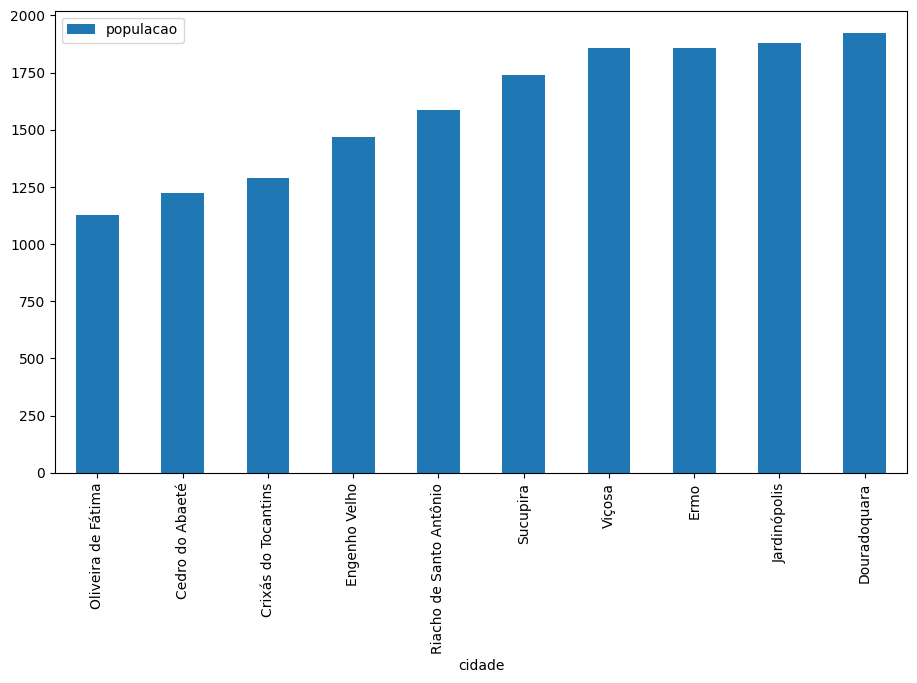

In [28]:
cidades10_menos_pop = dados_br[['cidade','populacao']].nsmallest(10,'populacao').reset_index(drop=True)
cidades10_menos_pop.plot.bar(x='cidade',figsize=(11,6))

 - Gere um gráfico de pizza com a proporção da população do Brasil por região.

([<matplotlib.patches.Wedge at 0x7f4d08fcf3a0>,
 [Text(1.0953067843464002, 0.1015039317699008, 'CENTRO-OESTE'),
  Text(0.3403971673702883, 1.046006581454574, 'NORDESTE'),
  Text(-1.092051880738083, 0.13199503693857612, 'NORTE'),
  Text(0.07321709435293881, -1.0975605938145343, 'SUDESTE'),
  Text(1.0734562510675558, -0.24019091790488045, 'SUL')],
 [Text(0.5974400641889455, 0.05536578096540043, '2.9%'),
  Text(0.1856711822019754, 0.5705490444297675, '34.1%'),
  Text(-0.5956646622207724, 0.07199729287558697, '22.1%'),
  Text(0.0399365969197848, -0.5986694148079277, '33.9%'),
  Text(0.5855215914913939, -0.1310132279481166, '7.0%')])

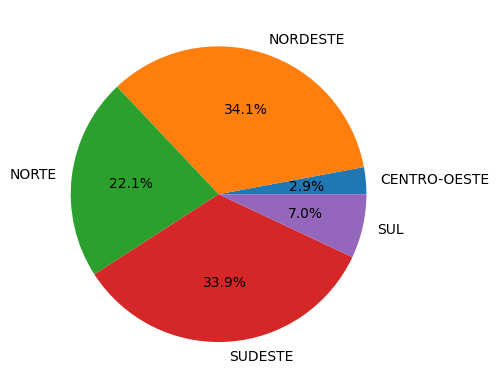

In [71]:
import matplotlib.pyplot as plt
pop_regiao_br = dados_br[['regiao','populacao']].groupby('regiao').agg('sum')
plt.pie(pop_regiao_br['populacao'],labels=pop_regiao_br.index,autopct='%1.1f%%')